# Deep Neural Netrowk Model - DEAP Valence emotion (Two Classes)

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras import metrics
from keras import regularizers
import models.nnmodels as nn
import utils.data as data

import gc
gc.enable()
seed = 0
np.random.seed(seed)
%matplotlib inline


import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
#config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

Using TensorFlow backend.


# Load data for two classes classification


In [2]:
print 'Loading DEAP dataset...'
subject_data_folds, valence_folds, arousal_folds = data.load_deap(32, 2)
print 'DEAP dataset is loaded.\n'

print 5*'#' + ' Dataset representation for each subject ' + 5*'#'
print '\nThere are {} subjects in the dataset.\n'.format(len(subject_data_folds))
print '(Trail/Video, Channel, Readings) : ', subject_data_folds[0].shape
print '(Trail/Video, label (valence or arousal)) : ', arousal_folds[0].shape



Loading DEAP dataset...
DEAP dataset is loaded.

##### Dataset representation for each subject #####

There are 32 subjects in the dataset.

(Trail/Video, Channel, Readings) :  (40, 40, 8064)
(Trail/Video, label (valence or arousal)) :  (40, 2)


# Reduce the features dimention (8064D >> 101D)
## Then Normalize the features

In [ ]:
# Reduce the features dimension
print 'Mapping features into Gaussian with mean zero and unit variance...'
reduced_data_folds = data.normalize_features(subject_data_folds, flag=True)
print 'Normalization done.'

Mapping features into Gaussian with mean zero and unit variance...
Normalization done.


# Train DNN model for two classes (low Valence / High Valence) classification

##### Two Classes Classification for Valence emotion Using Deep Neural Network #####

Training model to test on subject 01 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.70000, saving model to ../saved_models/best_model_for_s01_valence(2classes).h5
Epoch 00100: val_categorical_accuracy did not improve
40/40 [==============================] - 0s 236us/step
#### Result of DNN model for subject 01 #####

Loss: 0.737395060062 , Accuracy : 70.0%


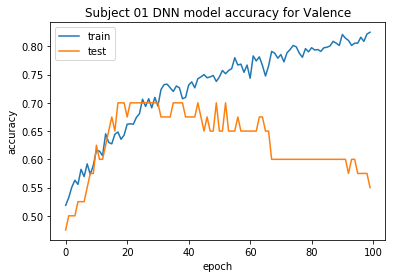

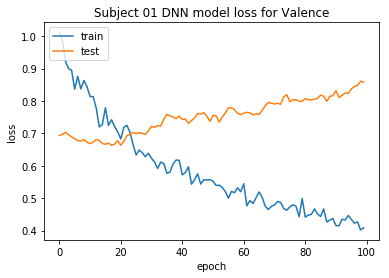

Training model to test on subject 02 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.62500, saving model to ../saved_models/best_model_for_s02_valence(2classes).h5
Epoch 00100: val_categorical_accuracy did not improve
40/40 [==============================] - 0s 341us/step
#### Result of DNN model for subject 02 #####

Loss: 0.58376159668 , Accuracy : 62.5%


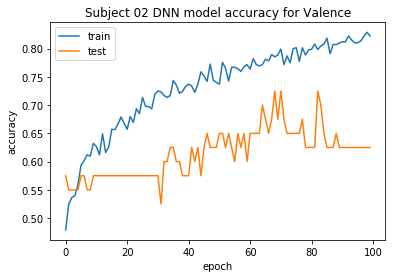

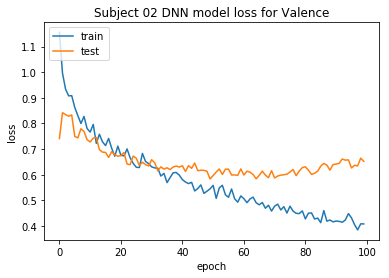

Training model to test on subject 03 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.72500, saving model to ../saved_models/best_model_for_s03_valence(2classes).h5
Epoch 00100: val_categorical_accuracy improved from 0.72500 to 0.75000, saving model to ../saved_models/best_model_for_s03_valence(2classes).h5
40/40 [==============================] - 0s 383us/step
#### Result of DNN model for subject 03 #####

Loss: 0.594344949722 , Accuracy : 75.0%


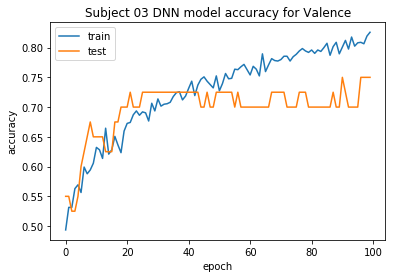

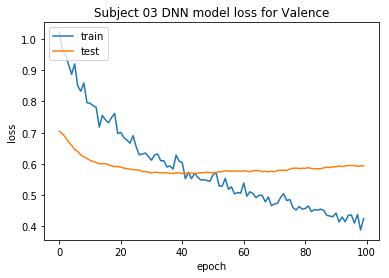

Training model to test on subject 04 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.65000, saving model to ../saved_models/best_model_for_s04_valence(2classes).h5
Epoch 00100: val_categorical_accuracy did not improve
40/40 [==============================] - 0s 418us/step
#### Result of DNN model for subject 04 #####

Loss: 0.746373790503 , Accuracy : 65.0%


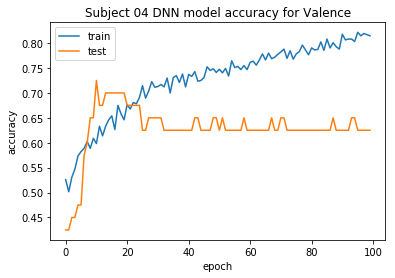

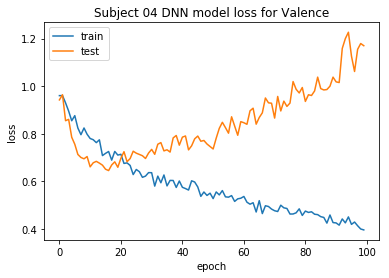

Training model to test on subject 05 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.70000, saving model to ../saved_models/best_model_for_s05_valence(2classes).h5
Epoch 00100: val_categorical_accuracy did not improve
40/40 [==============================] - 0s 366us/step
#### Result of DNN model for subject 05 #####

Loss: 0.665223479271 , Accuracy : 70.0%


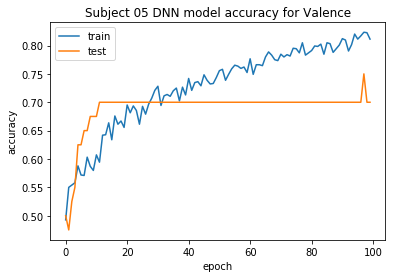

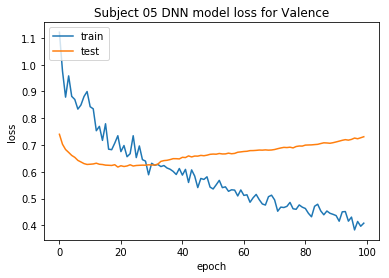

Training model to test on subject 06 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.75000, saving model to ../saved_models/best_model_for_s06_valence(2classes).h5
Epoch 00100: val_categorical_accuracy did not improve
40/40 [==============================] - 0s 405us/step
#### Result of DNN model for subject 06 #####

Loss: 0.6061242342 , Accuracy : 75.0%


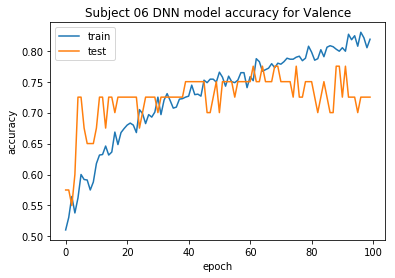

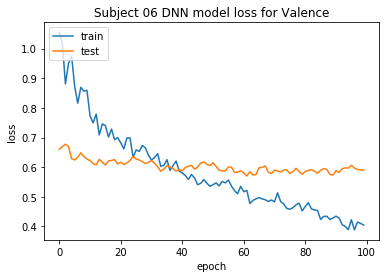

Training model to test on subject 07 ...

Epoch 00050: val_categorical_accuracy improved from -inf to 0.62500, saving model to ../saved_models/best_model_for_s07_valence(2classes).h5


In [ ]:
num_subjects = 32
batch_size = 80
epochs = 100
num_exp = 40
num_classes = 2



accuracies= []

print '##### Two Classes Classification for Valence emotion Using Deep Neural Network #####\n'

start = time.time()
for s in np.arange(0, num_subjects):
    
    
    X_val = reduced_data_folds[s]
    y_val = valence_folds[s]
    
    X_remaining_folds = reduced_data_folds[:s] + reduced_data_folds[s+1:]
    y_remaining_folds = valence_folds[:s] + valence_folds[s+1:]
    
    X_train = np.concatenate(X_remaining_folds)
    y_train = np.concatenate(y_remaining_folds)
 
   

    key = 's'+str(s+1).zfill(2)+'_valence(2classes)'
      
    # Valence classification model for two classes    
    model = nn.DNN(num_classes=2)
    
    # checkpoint
    filepath="../saved_models/best_model_for_{}.h5".format(key)
    
    print 'Training model to test on subject {} ...\n'.format(str(s+1).zfill(2))
    
    checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy',
                                verbose=1, save_best_only=True, mode='max', period=50)
    callbacks_list = [checkpoint]
    
    hist = model.fit(X_train, y_train, 
             batch_size=batch_size,
             epochs=epochs,
             shuffle=True,
             verbose=0,
             validation_data=(X_val, y_val), callbacks=callbacks_list)
    
    
    
    model.load_weights(filepath)
    
    scores = model.evaluate(x=X_val, y=y_val)
    
    
    
    print '#### Result of DNN model for subject {} #####\n'.format(str(s+1).zfill(2))
    print "Loss: {} , Accuracy : {}%".format(scores[0], scores[1]*100)
    
    

    accuracies.append(scores[1])
    # summarize history for accuracy
    plt.plot(hist.history['categorical_accuracy'])
    plt.plot(hist.history['val_categorical_accuracy'])
    plt.title('Subject ' +str(s+1).zfill(2)+ ' DNN model accuracy for Valence')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Subject ' +str(s+1).zfill(2)+ ' DNN model loss for Valence')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    del model
print 'finished training at, ', start - time.time()

# Accuracies

In [ ]:

min_acc_subject_idx, max_acc_subject_idx = argmin(accuracies), np.argmax(accuracies)

avg_acc =  reduce(lambda x, y: x + y, accuracies) / len(accuracies)

print 5*'#' + ' Accuracies per subject ' + 5*'#'

print 'Subject {} has the minimum accuracy : {}'.format(min_acc_subject_idx + 1, min(accuracies))
print 'Subject {} has the maximum accuracy : {}'.format(max_acc_subject_idx + 1, max(accuracies))

for subj in enumerate(accuracies):
    print 'Accuracy of Subject {} : {}'.format(subj+1, accuracies[subj])